# Introduction to Bayesian Learning
Author: Volker Krueger

## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image



samples_per_class = 500
number_of_classes = 10

filelist = sorted(glob.glob('../data/*/*.png'))
x = np.array([np.array(Image.open(fname)) for fname in filelist])

y = np.zeros(number_of_classes * samples_per_class,dtype=int)
for cls in range(1,number_of_classes):
    y[(cls*500):(cls+1)*500] = cls   



## Visualizing the Dataset

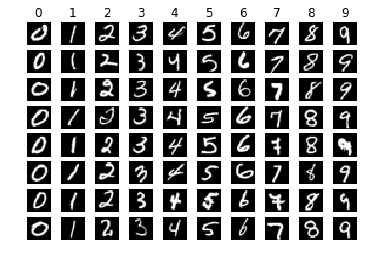

In [2]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()

## Mean

compute the mean of each class and display

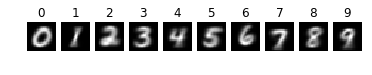

In [3]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    mean_of_class[cls]=np.mean(x[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()


## Generate Training and Testing data, and visualize

In [4]:
#######################################################################
# x_train will contain the training data
# y_train will contain the correct classes of the training data
# x_test will contain the test data
# y_test will contain the correct classes for the test data
#######################################################################
x_train=np.zeros((4000,20,20))
y_train=np.zeros(4000)
x_test =np.zeros((1000,20,20))
y_test =np.zeros(1000)

for cls in range(number_of_classes):
    idx=cls*400
    idx1=cls*500
    idx2=cls*100
    x_train[idx:idx+400,:,:]=x[idx1:idx1+400,:,:]
    y_train[idx:idx+400]=y[idx1:idx1+400]
    x_test[idx2:idx2+100,:,:]=x[idx1+400:idx1+500,:,:]
    y_test[idx2:idx2+100]=y[idx1+400:idx1+500]

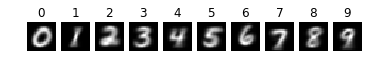

In [33]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    mean_of_class[cls]=np.mean(x_train[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

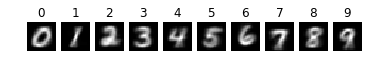

In [6]:
mean_of_class_test=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_test == cls)[0]
    mean_of_class_test[cls]=np.mean(x_test[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class_test[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

## put your code for the naive Bayesian classifier here

In [26]:
# Do we need a gaussian distribution or can pixel values simply be compared to the mean values?

# First do NCC
# Calculate MSE for each picture compared to each class
def NCC (x_test):
    y_test_pred = np.zeros(len(x_test))
    for (img, j) in zip(x_test, range(len(x_test))):
        MSE = 100000000
        y_pred = 10
        for (cls, i) in zip(mean_of_class, range(10)):
            MSE_temp = np.square(img - cls).sum()
            if MSE_temp < MSE:
                MSE = MSE_temp
                y_pred = i
        y_test_pred[j] = y_pred 
    return y_test_pred


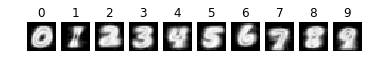

In [100]:
# Find std in each pixel
std_of_class = np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs_std = np.where(y_train == cls)[0]
    std_of_class[cls]=np.std(x_train[idxs_std],axis=0)
    # what value to replace with?
    std_of_class[std_of_class==0] = 1
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(std_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

In [101]:
# To understand structure of std vector
print(std_of_class[3,:,5].round(1))

[  0.    0.   11.8  40.1  79.5  83.8  66.3  43.5  29.7  42.5  44.7  36.8
  46.7  69.6  96.9 103.5  96.7  63.6  18.1   0. ]


In [102]:
# Implement Bayesian by dividing with sigmoid squared
def NaiveBayesian (x_test):
    y_test_pred = np.zeros(len(x_test))
    for (img, j) in zip(x_test, range(len(x_test))):
        MSE = 100000000
        y_pred = 10
        for (cls, cls_std, i) in zip(mean_of_class, std_of_class, range(10)):
            MSE_temp = np.square( (img - cls) / cls_std ).sum()
            if MSE_temp < MSE:
                MSE = MSE_temp
                y_pred = i
        y_test_pred[j] = y_pred 
    return y_test_pred

## now lets run your code and evaluate your accuracy

In [27]:
# Evaluate your NCC classifier on the test set
y_test_pred = NCC(x_test)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.796


In [103]:
# Evaluate your Bayesian classifier on the test set
y_test_pred = NaiveBayesian(x_test)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.795


## Let's visualize some of the wrongly classified test samples.

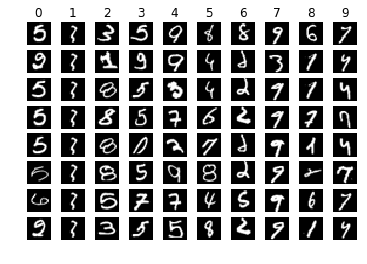

In [87]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    # Replace determines if sample is sent back to sample pool when chosen
    # If true same sample can appear twice
    idxs = np.random.choice(idxs, examples_per_class, replace=True)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()